In [8]:
import numpy as np
import pandas as pd
import re

import matplotlib as mlt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

In [10]:
train = pd.read_csv('https://raw.githubusercontent.com/swetha-ganapathy/ML_Basics/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/swetha-ganapathy/ML_Basics/master/test.csv')

print(train.columns)
print(test.columns)

print(set(train.columns)-set(test.columns))
print(set(test.columns)-set(train.columns))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
{'Survived'}
set()


In [11]:
train['na_count'] = np.sum(train.isnull(), axis=1)

test['na_count'] = np.sum(test.isnull(), axis=1)


In [12]:
train['Age'] = train['Age'].fillna(round(np.mean(train['Age'])))
train['Cabin'] = train['Cabin'].fillna('no value')
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].value_counts().index[0])

test['Age'] = test['Age'].fillna(round(np.mean(test['Age'])))
test['Fare'] = test['Fare'].fillna(round(np.mean(test['Fare'])))
test['Cabin'] = test['Cabin'].fillna('no value')

In [13]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
na_count       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
na_count       0
dtype: int64


0    549
1    342
Name: Survived, dtype: int64


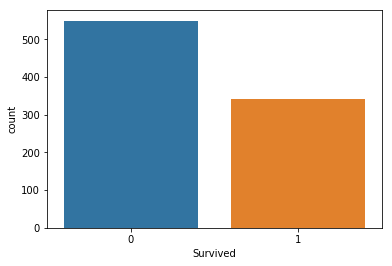

In [14]:
print(train['Survived'].value_counts())
sns.countplot(x='Survived', data=train)

In [15]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'na_count'],
      dtype='object')

In [16]:
print(train['PassengerId'].value_counts().value_counts())
print(test['PassengerId'].value_counts().value_counts())

train = train.drop(columns = 'PassengerId')
test = test.drop(columns = 'PassengerId')

1    891
Name: PassengerId, dtype: int64
1    418
Name: PassengerId, dtype: int64


Text(0.5,1,'test Pclass')

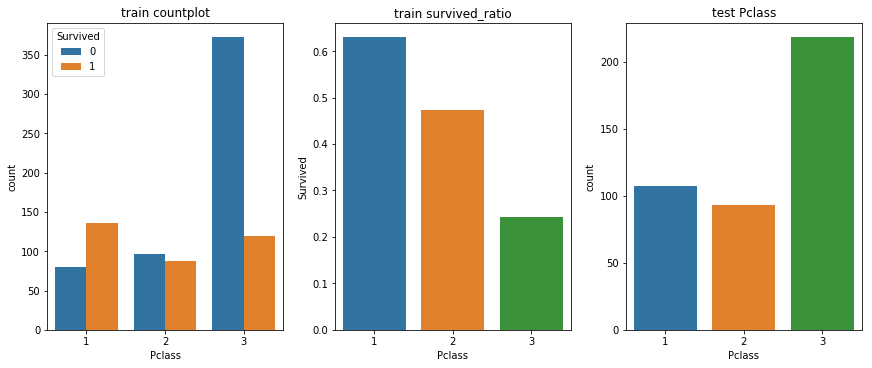

In [17]:
fig, axes = plt.subplots(1,3, figsize=(12,5), constrained_layout=True)

sns.countplot(x="Pclass", data=train, hue='Survived', ax=axes[0]).set_title('train countplot')
sns.barplot(x="Pclass", y='Survived', data=train.groupby('Pclass').mean()['Survived'].reset_index(), ax=axes[1]).set_title('train survived_ratio')
sns.countplot(x="Pclass", data=test, ax=axes[2]).set_title('test Pclass')

In [18]:
print(len(train['Name'])==len(np.unique(train['Name'])))

True


In [19]:
train['Name_length'] = train['Name'].apply(len)
test['Name_length'] = test['Name'].apply(len)

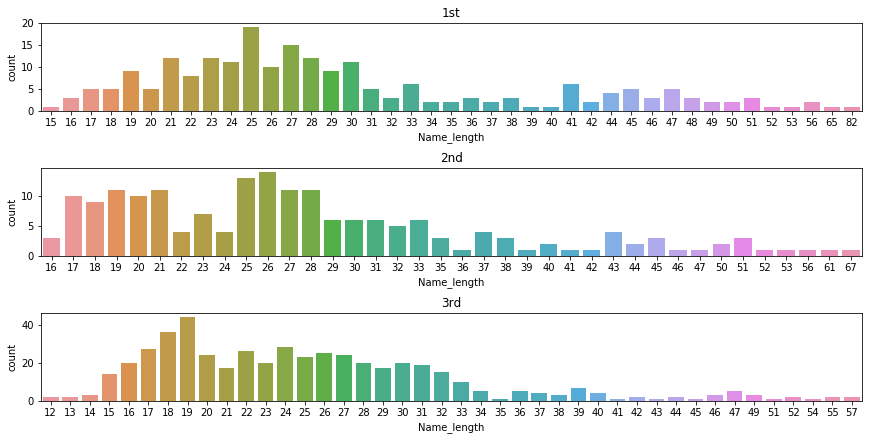

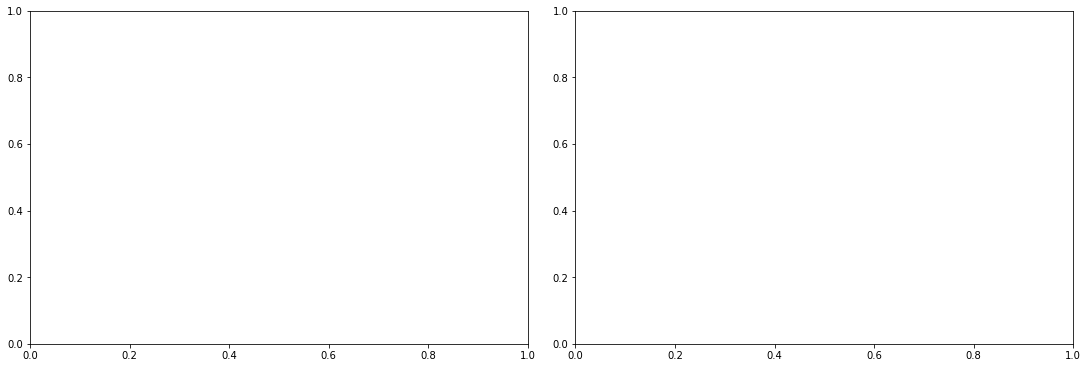

In [20]:
fig, axes = plt.subplots(3,1, figsize=(12,6), constrained_layout=True)

sns.countplot(x="Name_length", data=train[train['Pclass']==1], ax=axes[0]).set_title('1st')
sns.countplot(x="Name_length", data=train[train['Pclass']==2], ax=axes[1]).set_title('2nd')
sns.countplot(x="Name_length", data=train[train['Pclass']==3], ax=axes[2]).set_title('3rd')
train['name_title'] = train['Name'].apply(lambda x: re.search('([A-Za-z]+)\.', x).group(1))
test['name_title'] = test['Name'].apply(lambda x: re.search('([A-Za-z]+)\.', x).group(1))
fig, axes = plt.subplots(1,2, figsize=(15,5), constrained_layout=True)



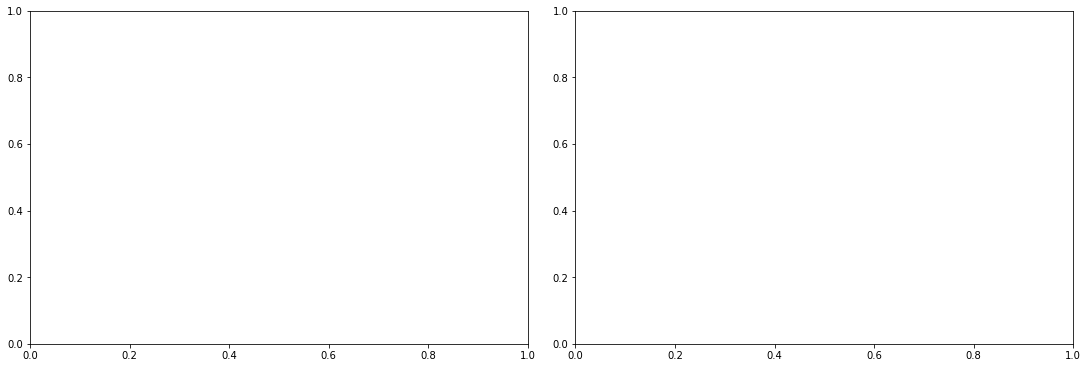

In [21]:
a = sns.countplot(x="name_title", data=train, order=train['name_title'].value_counts().index, ax=axes[0])
a.set_xticklabels(labels=train['name_title'].value_counts().index, rotation=45)
a.set_title('train name_title')
sns.countplot(x="name_title", data=test, order=test['name_title'].value_counts().index, ax=axes[1]).set_title('test name_title')
train.loc[~train['name_title'].isin(test['name_title']), 'name_title'] = 'etc'
test.loc[~test['name_title'].isin(train['name_title']), 'name_title'] = 'etc'
fig, axes = plt.subplots(1,2, figsize=(15,5), constrained_layout=True)

C:\Users\swetha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


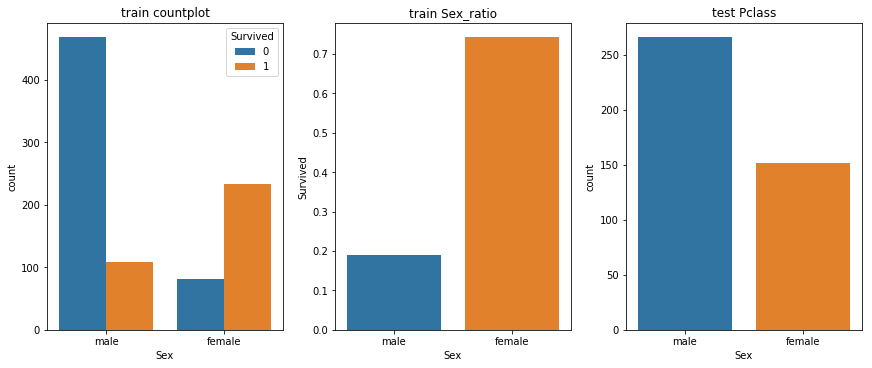

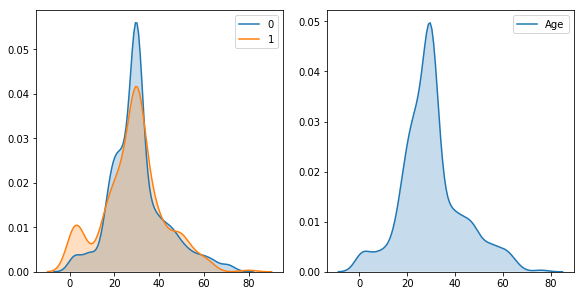

In [22]:
sns.countplot(x="name_title", data=train, order=train['name_title'].value_counts().index, ax=axes[0]).set_title('train name_title')
sns.countplot(x="name_title", data=test, order=test['name_title'].value_counts().index, ax=axes[1]).set_title('test name_title')
fig, axes = plt.subplots(1,3, figsize=(12,5), constrained_layout=True)

sns.countplot(x="Sex", data=train, hue='Survived', ax=axes[0]).set_title('train countplot')
sns.barplot(x="Sex", y='Survived', data=train.groupby('Sex').mean()['Survived'].reset_index(), order=['male', 'female'], ax=axes[1]).set_title('train Sex_ratio')
sns.countplot(x="Sex", data=test, ax=axes[2]).set_title('test Pclass')
fig, axes = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)

for val in [0, 1]:
    sns.kdeplot(train.loc[train['Survived']==val, 'Age'], shade=True, label=val, ax=axes[0])

sns.kdeplot(data=test['Age'], shade=True, ax=axes[1])

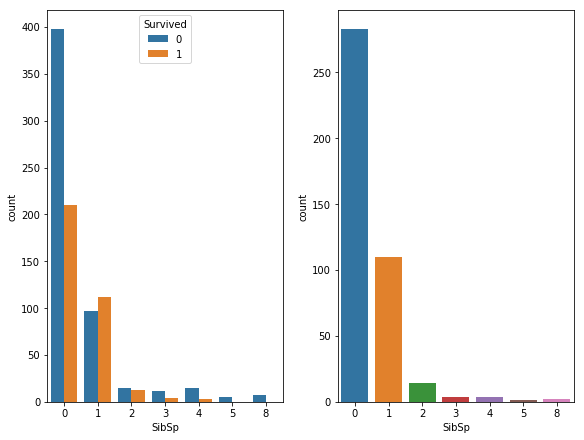

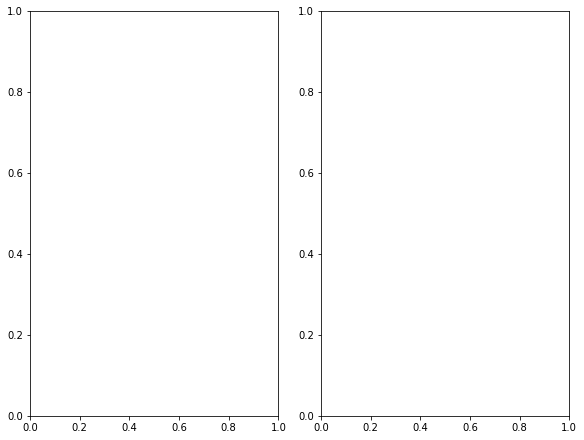

In [23]:
train['cate_age'] = pd.cut(train['Age'], [0, 15, 25, 40, 60, np.max(train['Age'])], labels=[1, 2, 3, 4, 5])
test['cate_age'] = pd.cut(test['Age'], [0, 15, 25, 40, 60, np.max(train['Age'])], labels=[1, 2, 3, 4, 5])
fig, axes = plt.subplots(1,2, figsize=(8,6), constrained_layout=True)

sns.countplot(x='SibSp', data=train, hue='Survived', ax=axes[0])
sns.countplot(x='SibSp', data=test, ax=axes[1])
fig, axes = plt.subplots(1,2, figsize=(8,6), constrained_layout=True)

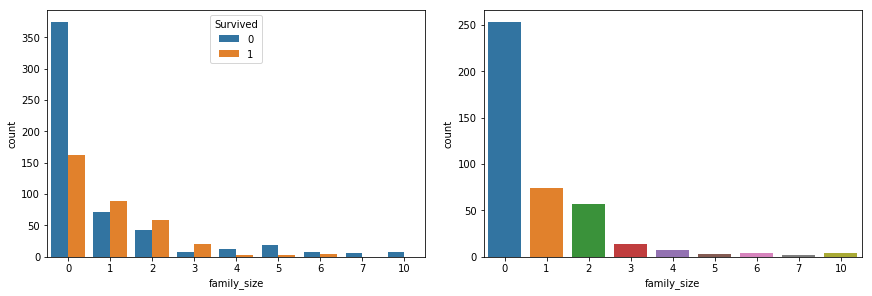

In [24]:
sns.countplot(x='Parch', data=train, hue='Survived', ax=axes[0])
sns.countplot(x='Parch', data=test, ax=axes[1])
train['family_size'] = train['SibSp'] + train['Parch']
test['family_size'] = test['SibSp'] + test['Parch']
crosstab_family_size = pd.crosstab(train['Ticket'], train['family_size'])
crosstab_family_size.loc[np.count_nonzero(crosstab_family_size==0, axis=1)!=8, ]
fig, axes = plt.subplots(1,2, figsize=(12,4), constrained_layout=True)

sns.countplot(x='family_size', data=train, hue='Survived', ax=axes[0])
sns.countplot(x='family_size', data=test, ax=axes[1])
train.loc[train['family_size'].isin([0, 4, 5, 6, 7, 10]), 'family_size'] = 0
train.loc[train['family_size'].isin([1, 2, 3]), 'family_size'] = 1
test.loc[test['family_size'].isin([0, 4, 5, 6, 7, 10]), 'family_size'] = 0
test.loc[test['family_size'].isin([1, 2, 3]), 'family_size'] = 1
train.groupby('Ticket').mean()['Fare']
train[['Ticket', 'Fare']]
# Ticket length column
train['Ticket_length'] = train['Ticket'].apply(len)
test['Ticket_length'] = test['Ticket'].apply(len)

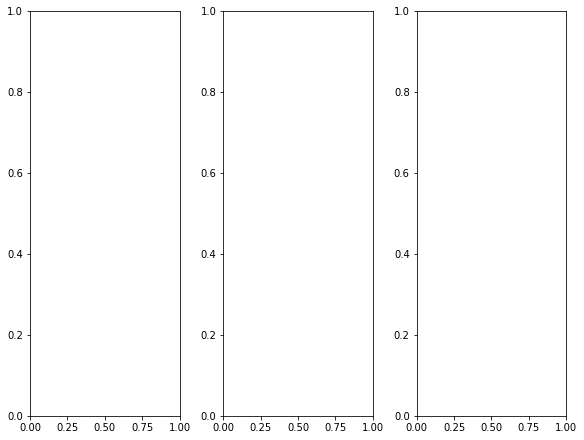

In [25]:
train['Cabin'].value_counts()
train['Cabin_first'] = train['Cabin'].apply(lambda x: x[0])
test['Cabin_first'] = test['Cabin'].apply(lambda x: x[0])
#embarked
fig, axes = plt.subplots(1,3, figsize=(8,6), constrained_layout=True)

In [26]:
sns.countplot(x='Embarked', data=train, hue='Survived', ax=axes[0])
sns.barplot(x='Embarked', y='Survived', data=train.groupby('Embarked').mean()['Survived'].reset_index(), order=['S', 'C', 'Q'], ax=axes[1])
sns.countplot(x='Embarked', data=test, order=['S', 'C', 'Q'], ax=axes[2])

In [27]:
a = train.groupby(['cate_age', 'Pclass', 'Sex']).mean()['Survived']
a = a.fillna(0).reset_index()
a.columns = ['cate_age', 'Pclass', 'Sex', 'est_Survived']

In [28]:
train = pd.merge(train, a, how='left', on=['cate_age', 'Pclass', 'Sex'])
test = pd.merge(test, a, how='left', on=['cate_age', 'Pclass', 'Sex'])

In [29]:
features = ['Name_length', 'est_Survived', 'Pclass', 'Sex', 'Embarked', 'na_count', 'name_title', 'cate_age', 'family_size']

In [30]:
train2 = train[features]
test2 = test[features]

In [31]:
label = LabelEncoder()

df = pd.concat([train2, test2])

for i in ['Sex', 'Embarked', 'name_title']:
    df[i] = label.fit_transform(df[i])

In [32]:
train2 = df.iloc[:891, :]
test2 = df.iloc[891:, :]

In [33]:
train2 = pd.concat([train['Survived'], train2.iloc[:, :2], pd.get_dummies(train2.iloc[:, 2:].astype(object))], axis=1)

In [34]:
test2 = pd.concat([test2.iloc[:, :2], pd.get_dummies(test2.iloc[:, 2:].astype(object))], axis=1)

In [35]:
def rf_model(train_val, test_val):
    regr = RandomForestRegressor(max_depth=max_depth, random_state=0, n_estimators=100).fit(
    train_val.drop(columns=['Survived']), train_val['Survived'])
    
    test_val_y = regr.predict(test_val.drop(columns=['Survived'])) > decision_boundary
    test_val_y = test_val_y.astype(int)
    
    true_count = 0
    for i in test_val_y - test_val['Survived']:
        if i == 0:
            true_count+=1
    
    return true_count/len(test_val_y)

In [36]:
cv = KFold(5, shuffle=True, random_state=0)

for j in range(2, 9):
    for k in range(30, 51):
        L = []
        for i, (idx_train, idx_test) in enumerate(cv.split(train2)):
            train_val = train2.iloc[idx_train]
            test_val = train2.iloc[idx_test]
            
            max_depth=j
            decision_boundary=k/100
            
            L.append(rf_model(train_val, test_val))
            if np.mean(L) > .83:
                print('accuacy : {}, max_depth : {}, decision boundary : {}'.format(np.mean(L), j, k/100))

accuacy : 0.8379888268156425, max_depth : 3, decision boundary : 0.5
accuacy : 0.8435754189944135, max_depth : 4, decision boundary : 0.49
accuacy : 0.83175360408428, max_depth : 4, decision boundary : 0.49
accuacy : 0.8491620111731844, max_depth : 4, decision boundary : 0.5
accuacy : 0.8336158014772037, max_depth : 4, decision boundary : 0.5
accuacy : 0.8302680308831837, max_depth : 4, decision boundary : 0.5
accuacy : 0.8324022346368715, max_depth : 5, decision boundary : 0.48
accuacy : 0.8379888268156425, max_depth : 5, decision boundary : 0.49
accuacy : 0.8435754189944135, max_depth : 5, decision boundary : 0.5


In [40]:
regr = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=100).fit(
    train2[test2.columns], train2['Survived'])
test_y = regr.predict(test2)
test_y = test_y > .5
predictions = test_y.astype(int)
test_PassengerId = pd.read_csv('https://raw.githubusercontent.com/swetha-ganapathy/ML_Basics/master/gender_submission.csv')['PassengerId']
submission = pd.concat([pd.DataFrame(test_PassengerId), pd.DataFrame({'Survived':predictions})], axis=1)
submission.to_csv("submission_rf4.csv", index=False)